# Insurance Claims- Fraud Detection


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("insaurancefraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


there are total 1000 rows and 40 columns in the data set

'months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year' are the input columns and fraud_reported is the output column

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df["policy_bind_date"]=pd.to_datetime(df["policy_bind_date"])

In [9]:
df["policy_annual_premium"].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

In [10]:
df.loc[df["policy_annual_premium"]==" "]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


In [11]:
df["policy_annual_premium"]=df["policy_annual_premium"].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [13]:
df.drop(["_c39","auto_year","incident_date","policy_number",],axis =1, inplace =True)

In [14]:
df.shape

(1000, 36)

<AxesSubplot:>

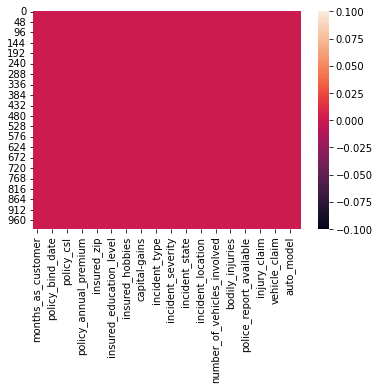

In [15]:
sns.heatmap(df.isnull())

here we can see that there is no missing values in the dataset.

now we will be doing some univariate ,bivariate and multivariate analysis

In [16]:
obj_columns=df[['policy_state', 'policy_csl','insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location',
       'property_damage', 'bodily_injuries',
       'police_report_available', 'auto_make',
       'auto_model','fraud_reported']].copy()

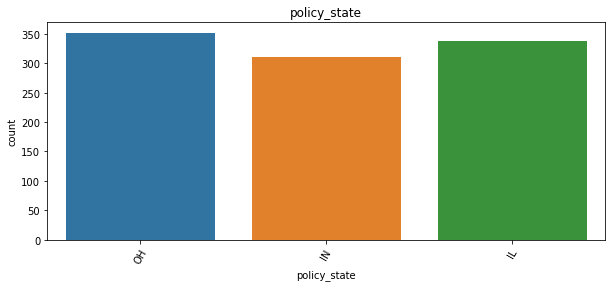

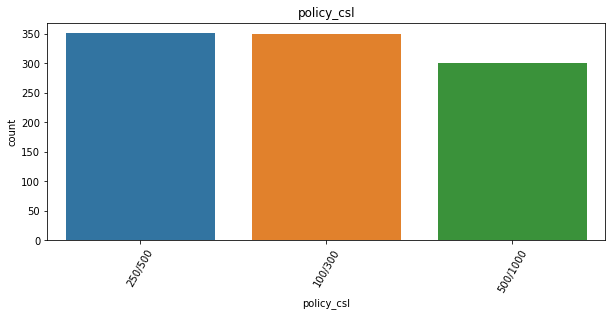

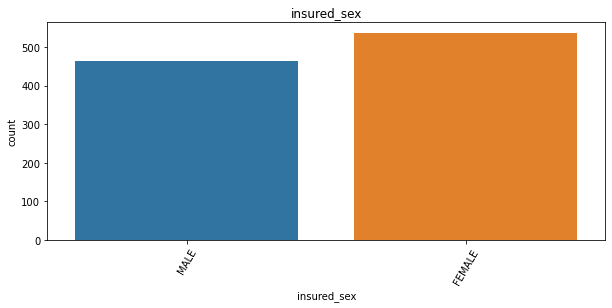

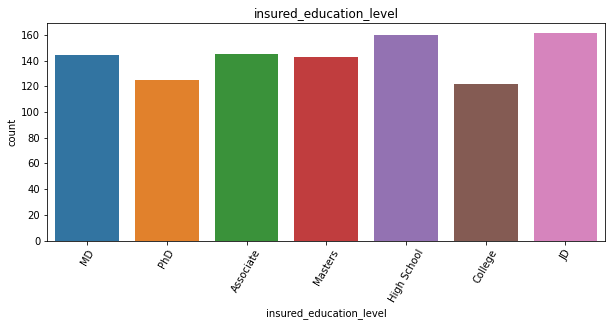

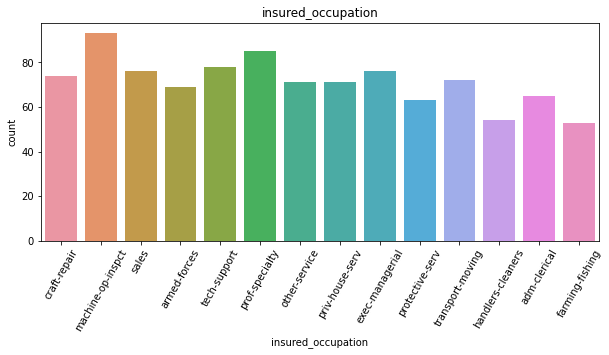

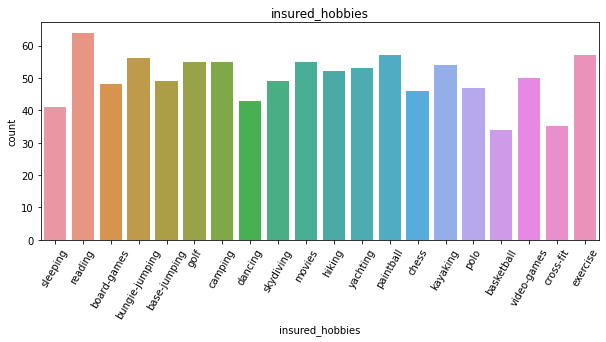

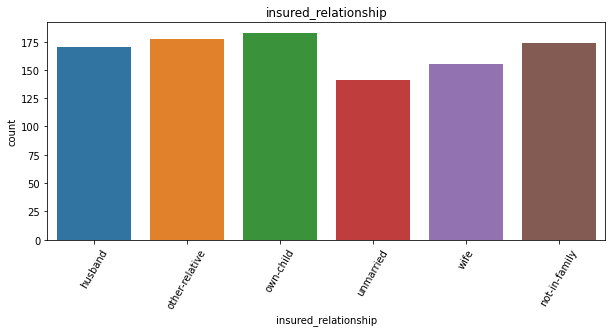

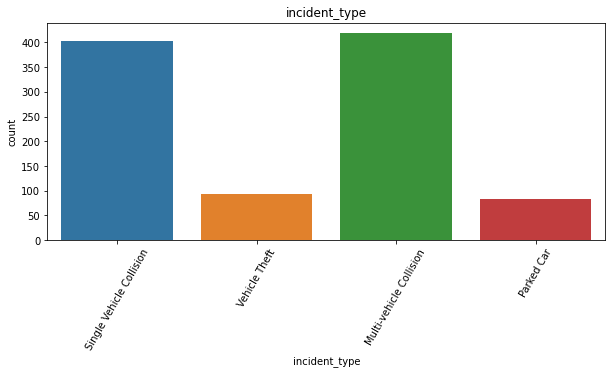

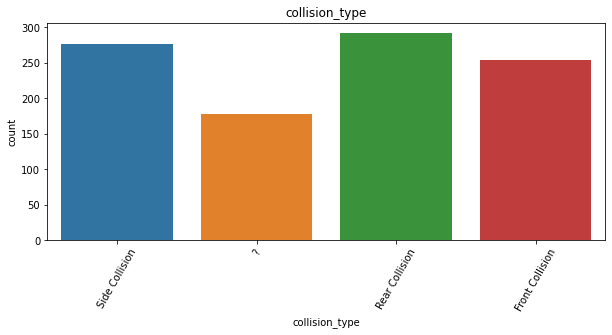

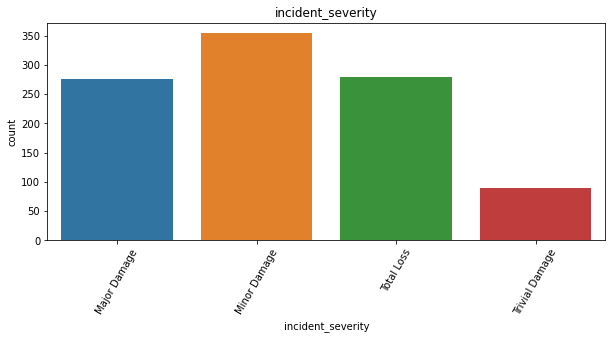

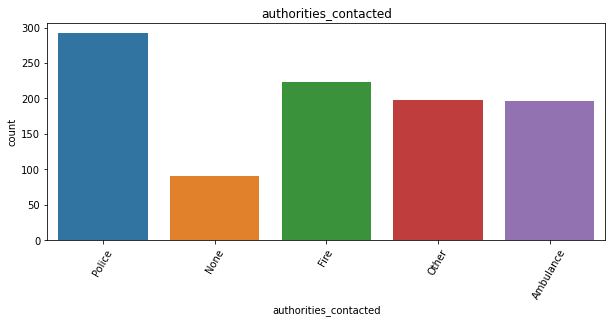

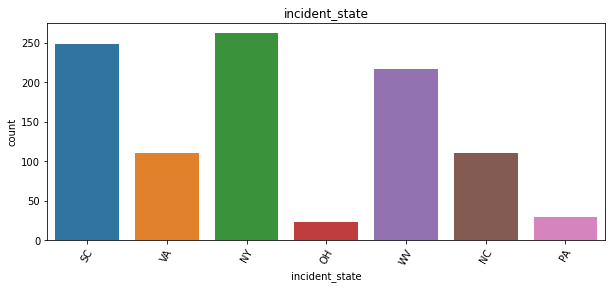

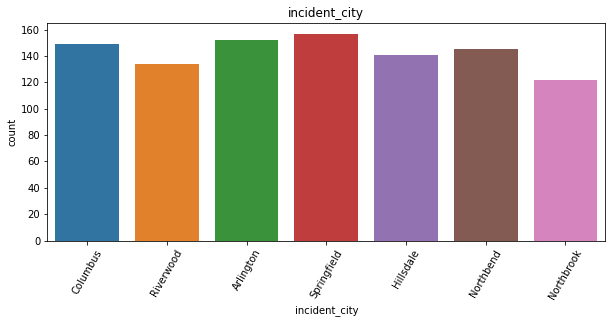

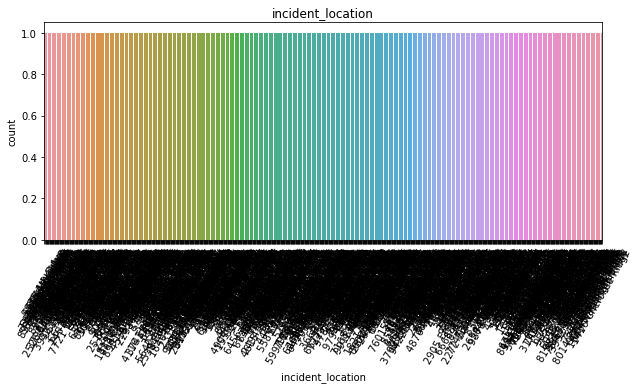

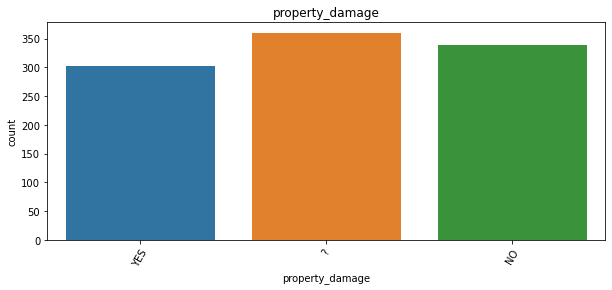

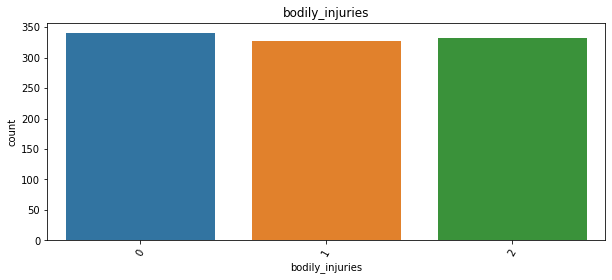

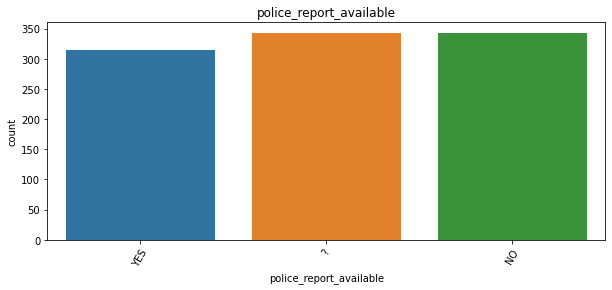

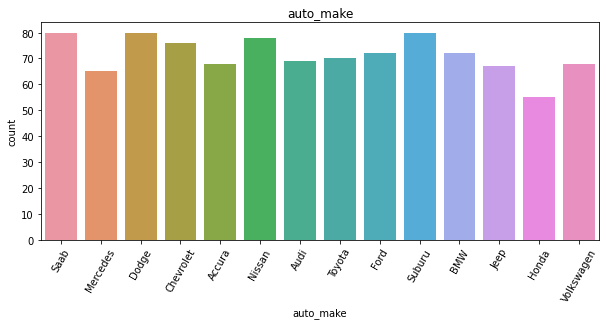

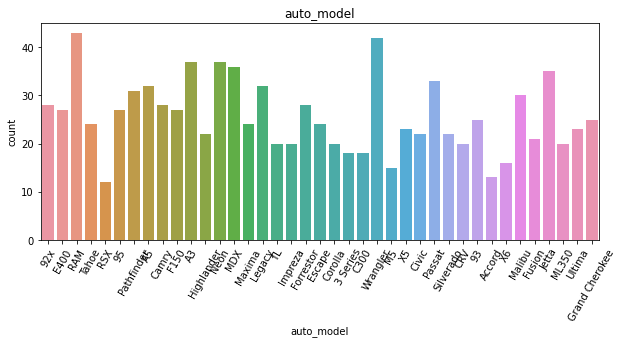

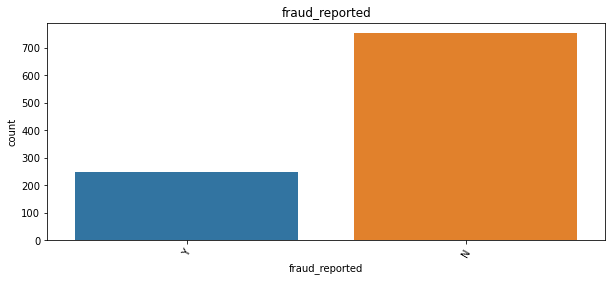

In [17]:
for col in obj_columns.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.countplot(obj_columns[col])
    plt.title(col)
    plt.xticks(rotation=60)
    plt.show()

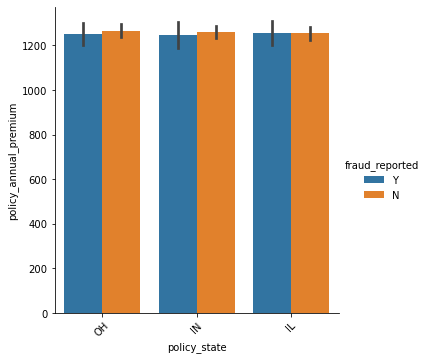

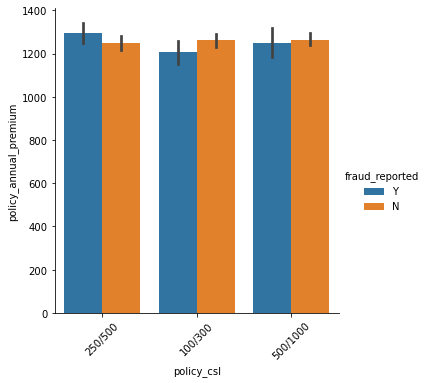

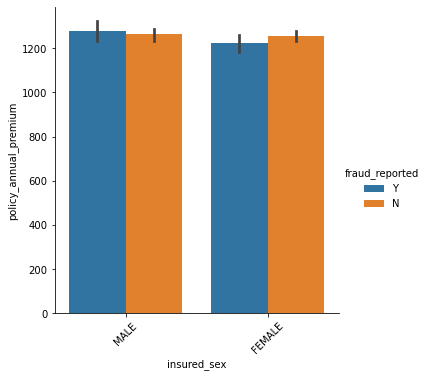

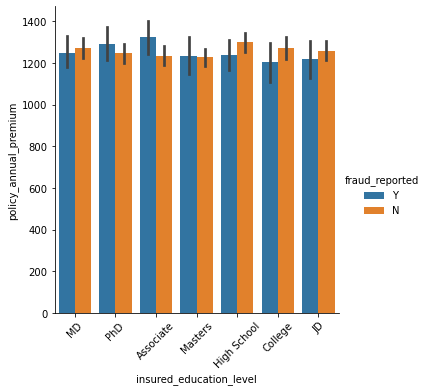

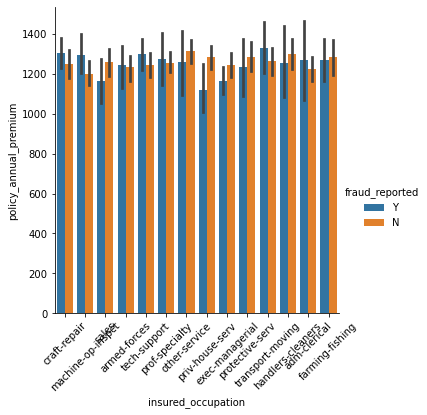

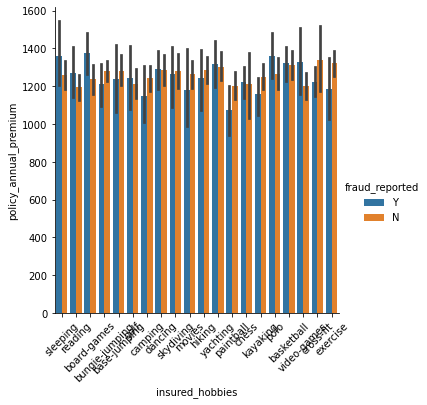

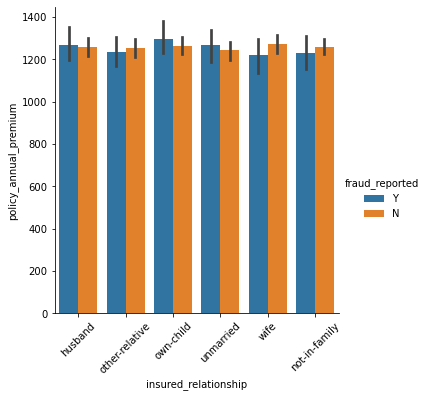

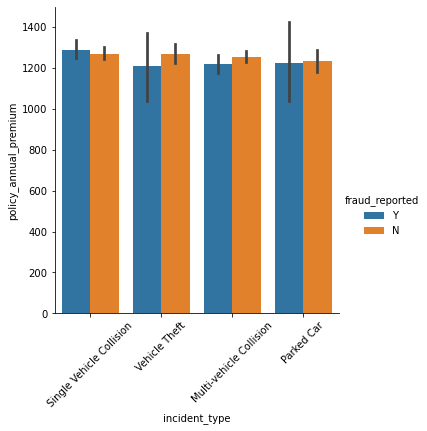

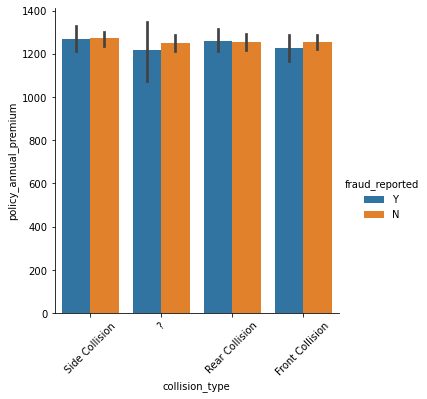

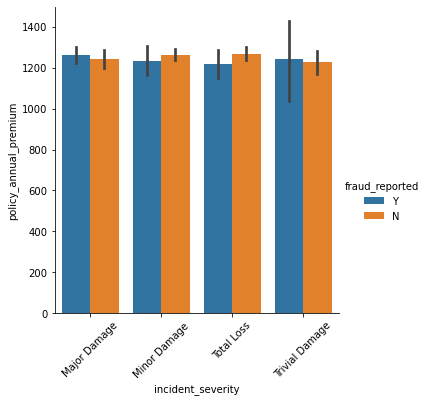

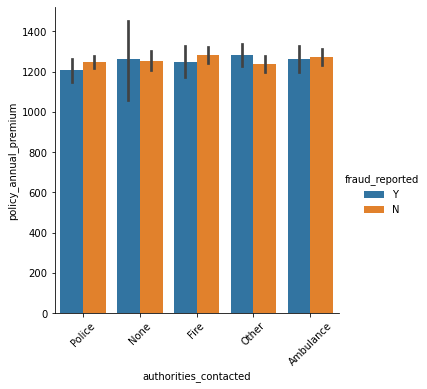

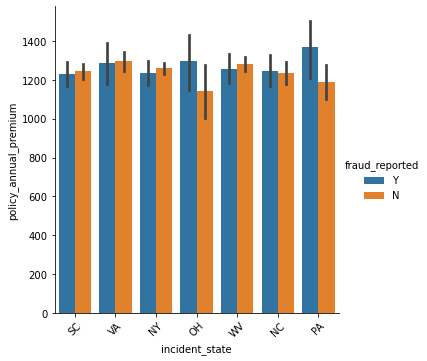

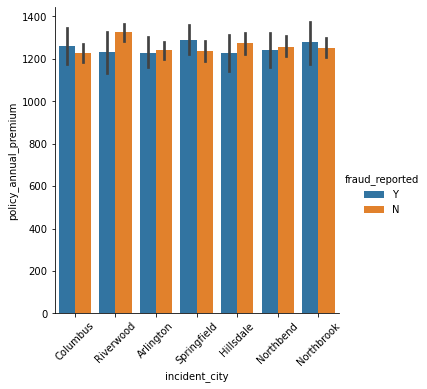

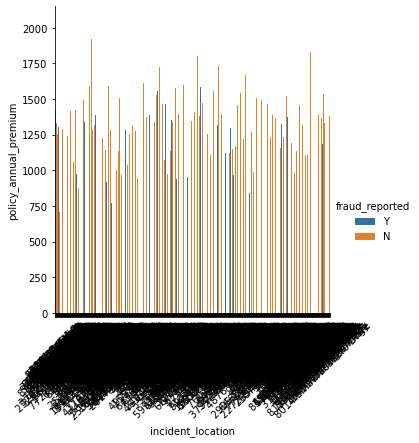

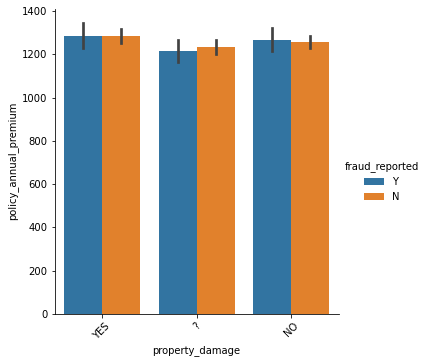

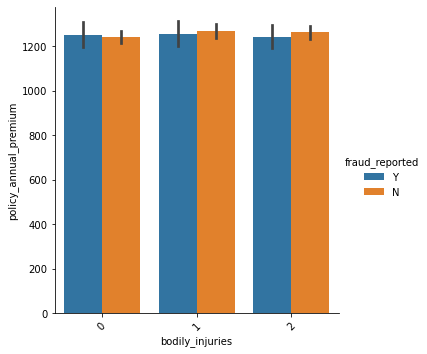

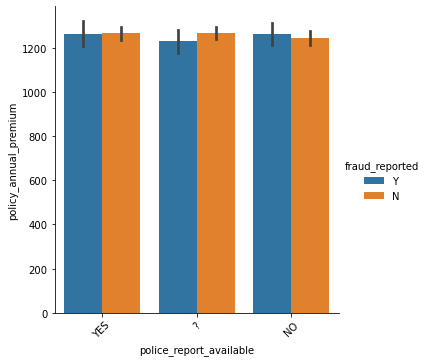

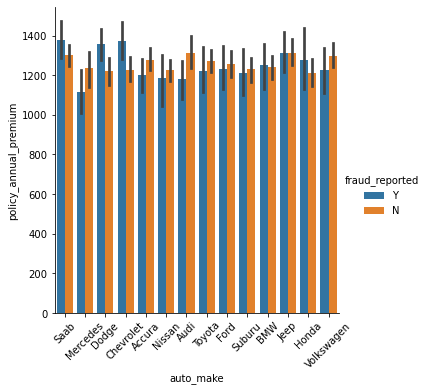

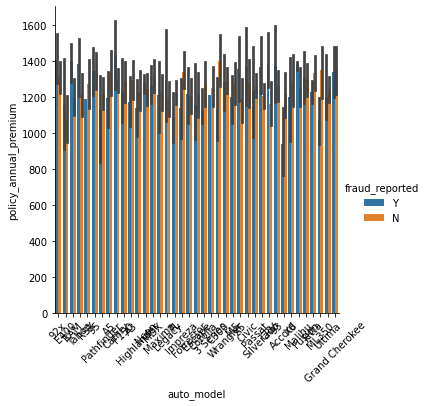

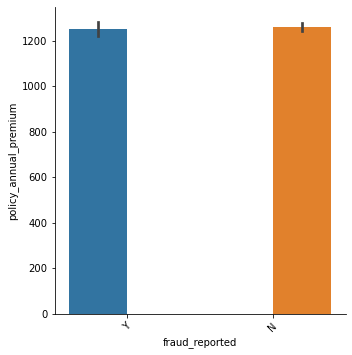

In [18]:
for col in obj_columns.columns:
    sns.catplot(x=col,y='policy_annual_premium',hue="fraud_reported",data=df,kind="bar")
    plt.xticks(rotation=45)

# observations

from the above univariate and bi variate analysis we can seethat 

1) policy state is more or less equal for all "OH","IN" an "IL" states and fraud reports are also fifty fifty .

2)fraud report is more in case of 250/500 in comparison to 100/300

3)female insuared persons with negetive fraud report is more in comparison to male persons

4)policy annual premium is high in case of associate education person 

5)policy annual premium is high in case of insured relationship of own child

6)policy annual premium is high in case of single vehicle collision incident type

7)from overall view it is seen that negetive fraud report is more than positive fraud report

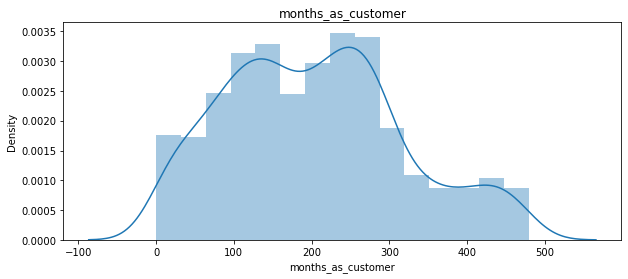

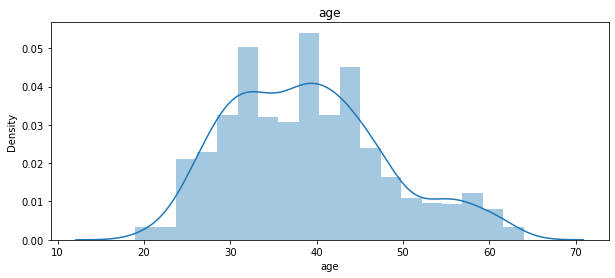

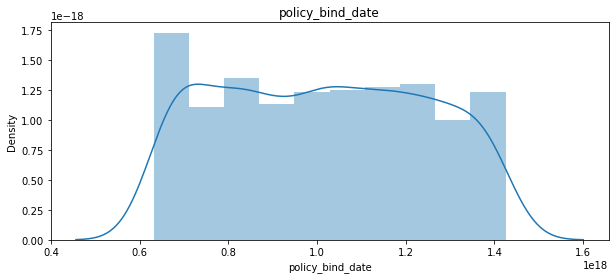

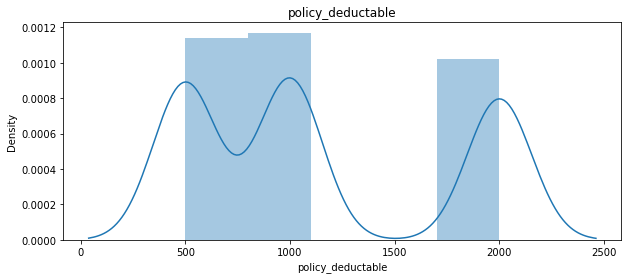

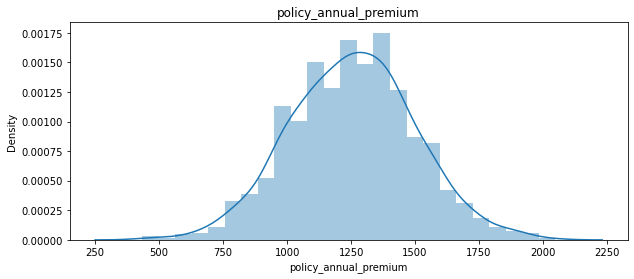

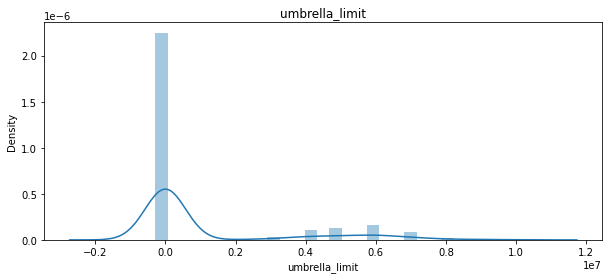

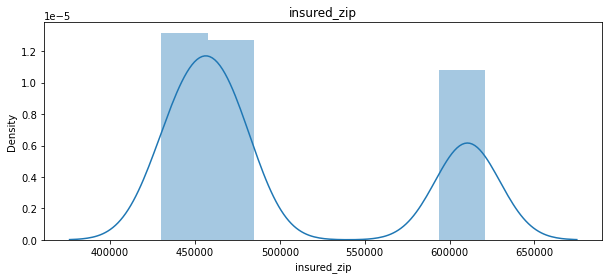

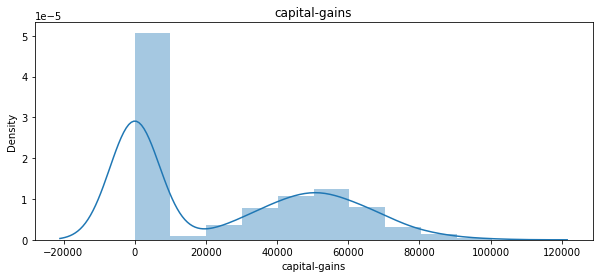

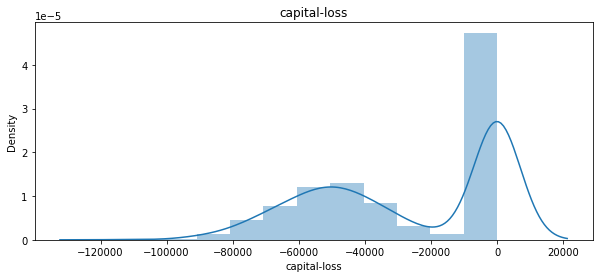

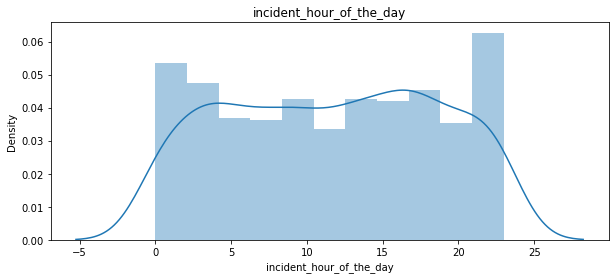

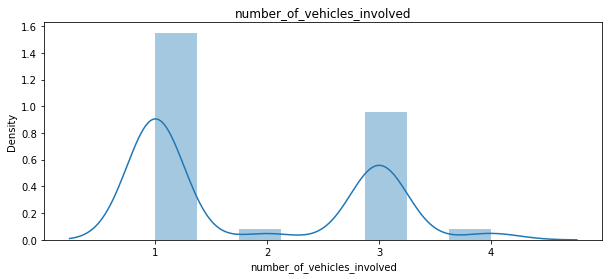

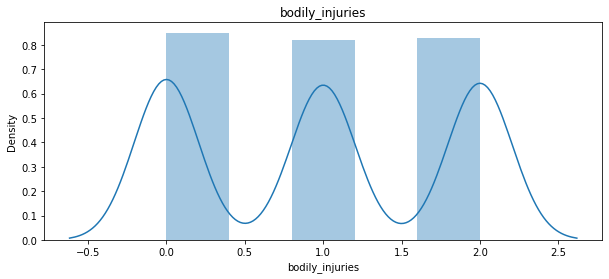

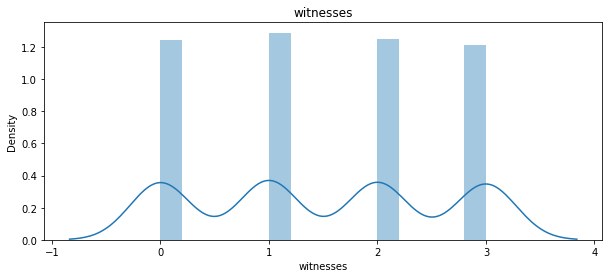

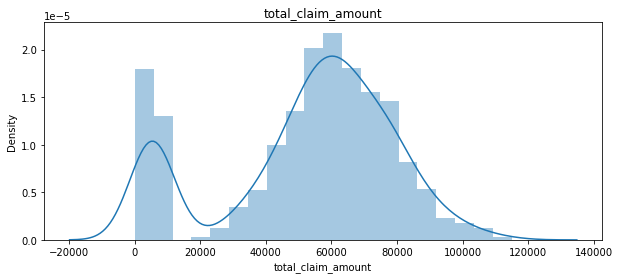

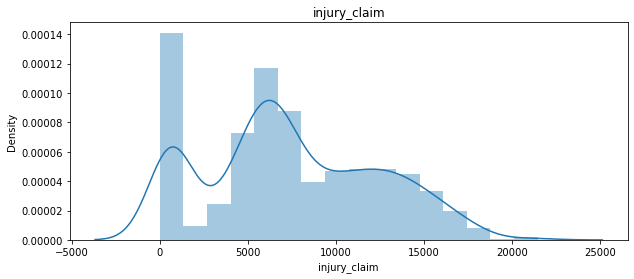

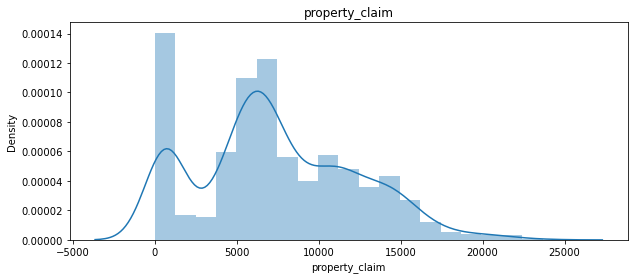

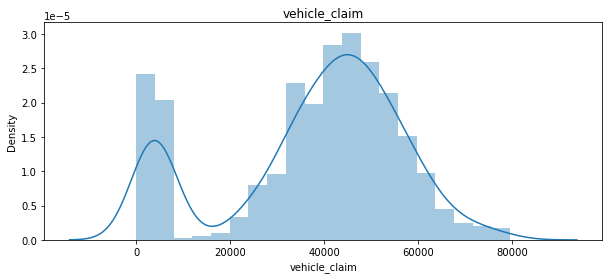

In [19]:
df_numeric=df[['months_as_customer', 'age', 'policy_bind_date',
              'policy_deductable','policy_annual_premium', 'umbrella_limit', 'insured_zip',
              'capital-gains', 'capital-loss','incident_hour_of_the_day','number_of_vehicles_involved',
              'bodily_injuries','witnesses','total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim',]].copy()
for col in df_numeric.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.distplot(df_numeric[col])
    plt.title(col)
    plt.show()

from the above analysis we can see that most of the variaables are normally distributed except umbrella limit , insured zip,capital gains,capital loss, no of vehicles involved 

In [20]:
df_numeric.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

not much skewness is present in the data set 

In [22]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= oe.fit_transform(df[i].values.reshape(-1,1))

we can see some collumns are object or catagorical collumns so we have to encode these collumns. Here we will use ordinal encoder to encode the catagorical collumns.

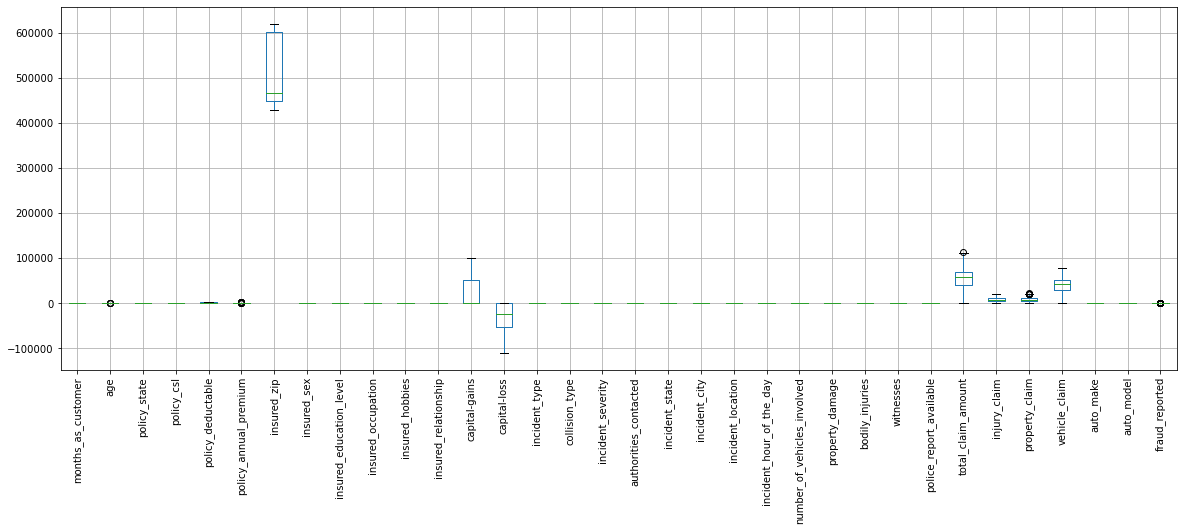

In [24]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [21]:
df.drop(["umbrella_limit"],axis =1, inplace =True)

In [27]:
df.drop(["policy_bind_date"],axis =1, inplace =True)

we have used z score method to remove outliers, but we can see that we will loose more than 15% data if we remove outliers . as the maximum features are catagorical so no need to remove the outliers.

In [28]:
import scipy
from scipy.stats import zscore

In [29]:
z= np.abs(zscore(df))
print(z)

     months_as_customer       age  policy_state  policy_csl  \
0              1.078140  0.990836      1.187173    0.060937   
1              0.208995  0.334073      0.016856    0.060937   
2              0.608002  1.088913      1.187173    1.182668   
3              0.452355  0.224613      1.220886    0.060937   
4              0.208995  0.552994      1.220886    1.304542   
..                  ...       ...           ...         ...   
995            1.746582  0.103769      1.187173    1.304542   
996            0.704407  0.224613      1.220886    1.182668   
997            0.642767  0.541611      1.187173    0.060937   
998            2.208028  2.523284      1.220886    1.304542   
999            2.190645  2.304363      1.187173    0.060937   

     policy_deductable  policy_annual_premium  insured_zip  insured_sex  \
0             0.222383               0.616705     0.489529     1.076953   
1             1.412784               0.242521     0.461008     1.076953   
2             1.41

In [30]:
threshold=3
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 5,  5, 29,  5, 13], dtype=int64))


In [31]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(995, 34)

In [32]:
df.shape

(1000, 34)

In [33]:
dataloss=(1000-995)/1000*100
dataloss

0.5

In [34]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,501214.488000,0.463000,2.966000,6.653000,...,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,71701.610941,0.498879,1.948497,4.019048,...,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,430104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,448404.500000,0.000000,1.000000,3.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,466445.500000,0.000000,3.000000,7.000000,...,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,603251.000000,1.000000,5.000000,10.000000,...,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,620962.000000,1.000000,6.000000,13.000000,...,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,1.000000


<AxesSubplot:>

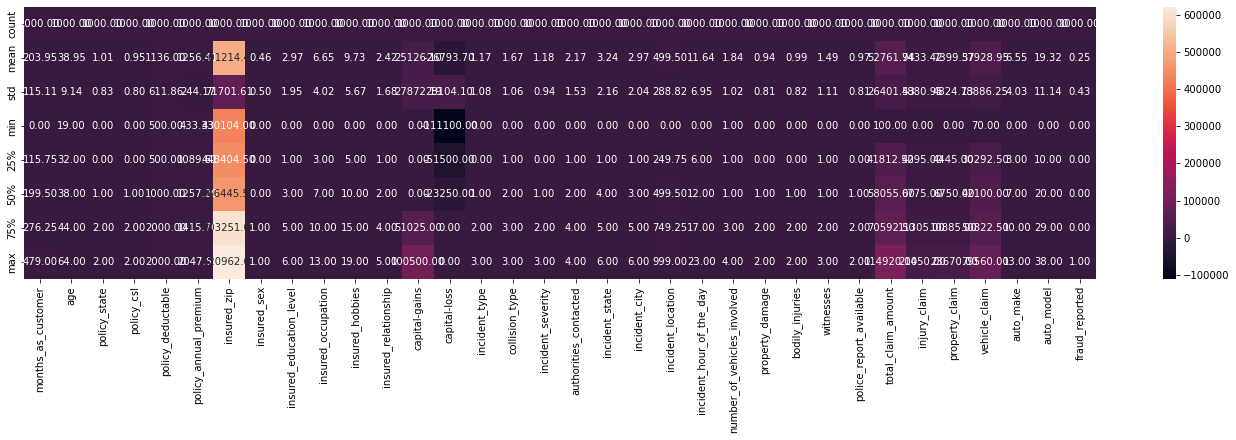

In [35]:
plt.figure(figsize=(24,5))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

In [36]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.017895,0.060925,-0.000833,0.009814,...,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.025604,0.073337,0.000969,0.017220,...,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,0.008777,-0.020481,-0.034327,-0.031215,...,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.006879,-0.010757,0.009153,0.015788,...,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.004545,-0.009733,0.015217,-0.046733,...,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,0.032354,0.038853,-0.019715,0.035922,...,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,1.000000,-0.036942,0.016079,-0.069077,...,0.028695,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,-0.036942,1.000000,0.009002,-0.006160,...,-0.020297,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,0.016079,0.009002,1.000000,-0.020298,...,-0.012072,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,-0.069077,-0.006160,-0.020298,1.000000,...,-0.000236,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564


<AxesSubplot:>

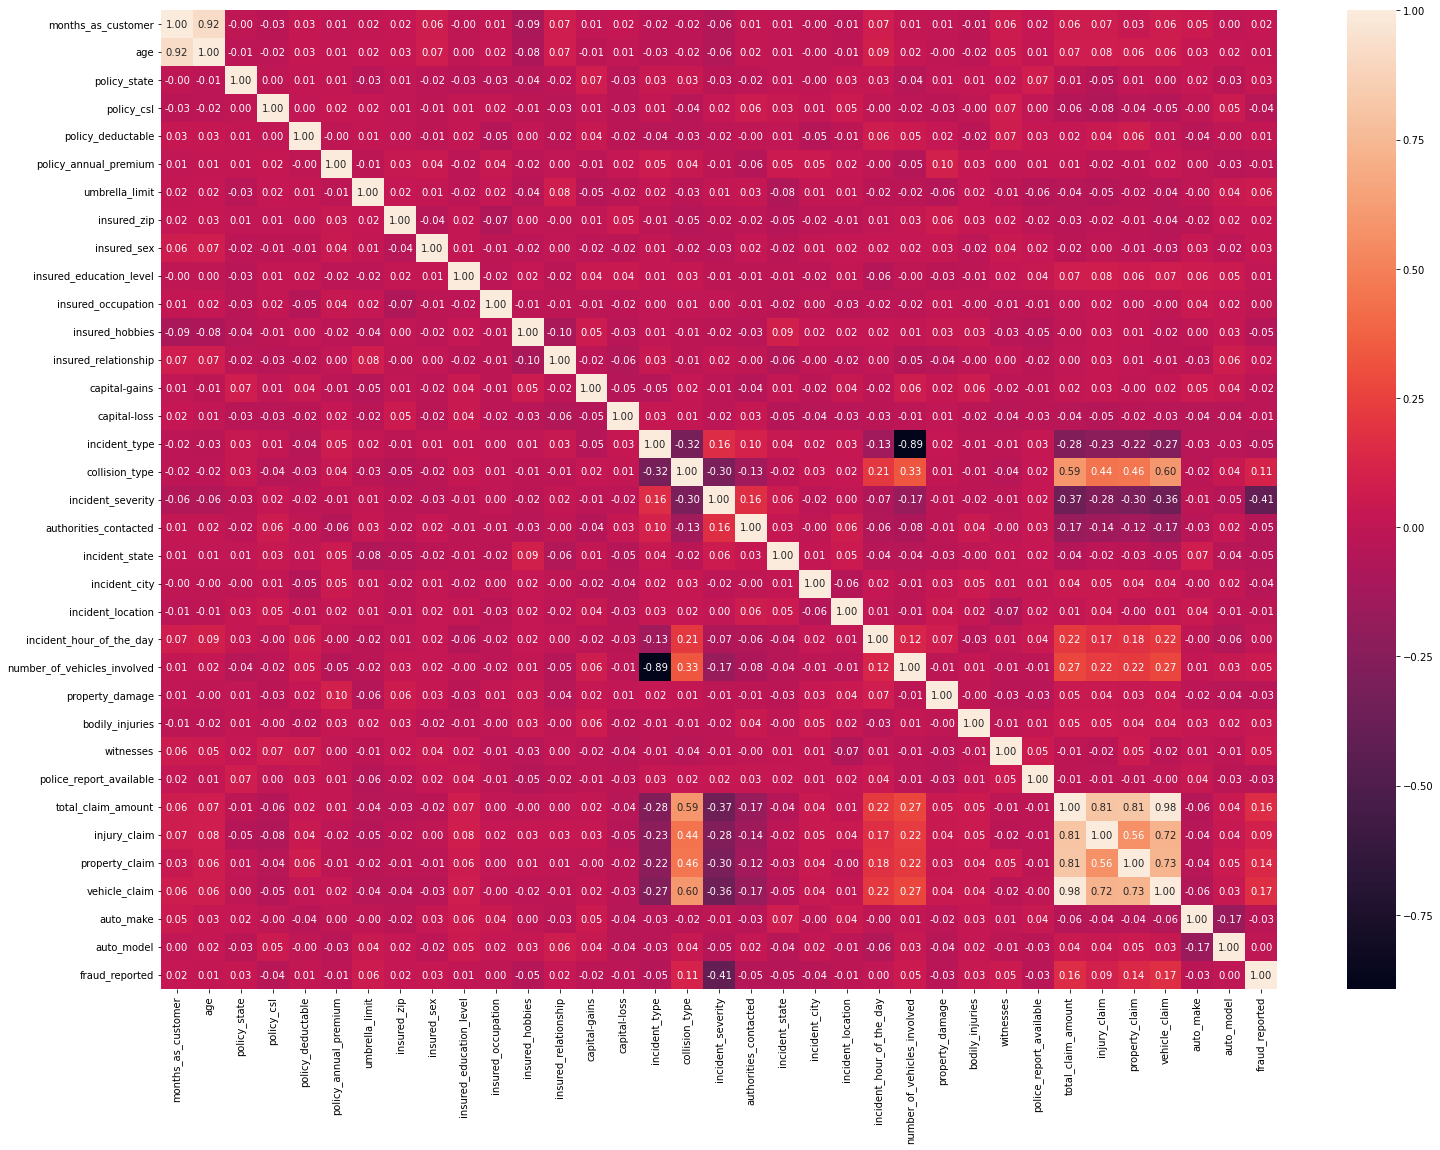

In [37]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True,fmt="0.2f")

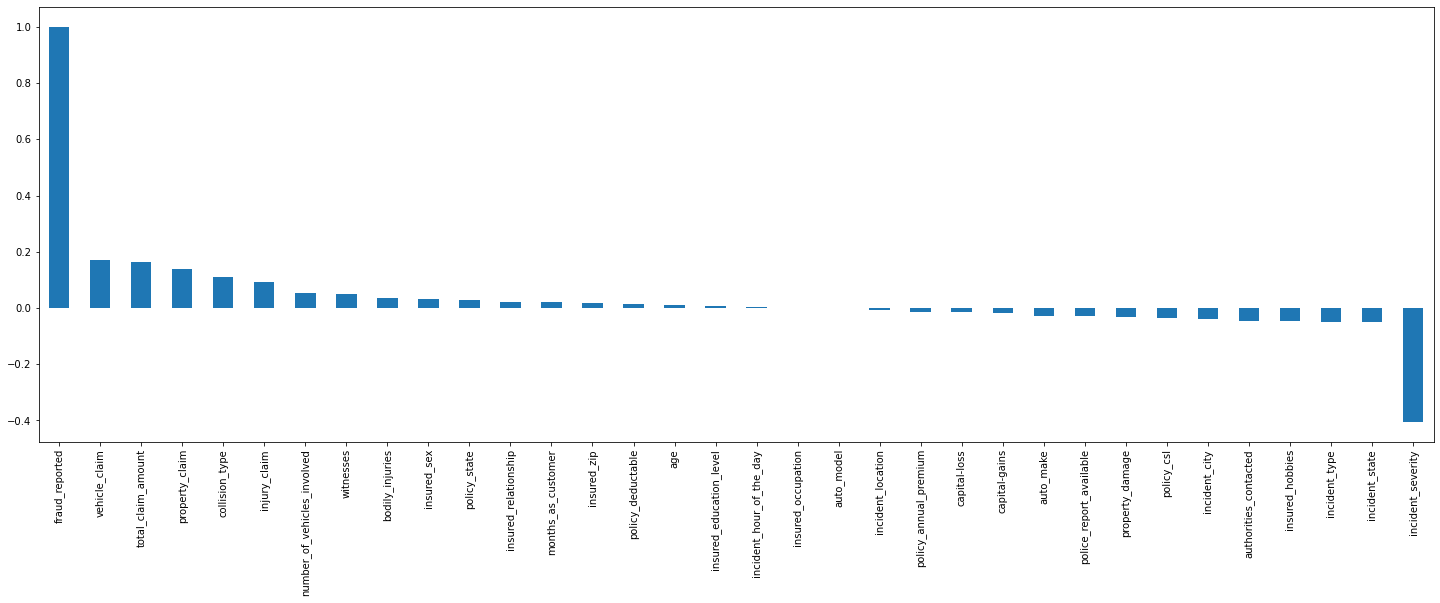

In [37]:
plt.figure(figsize=(25,8))
df.corr()["fraud_reported"].sort_values(ascending=False).plot(kind="bar")
plt.show()

In [38]:
x=df.drop(["fraud_reported"],axis=1)
y=df["fraud_reported"]
print(x.shape)
print(y.shape)

(1000, 33)
(1000,)


In [39]:
from sklearn.preprocessing import power_transform
xt=power_transform(x, method="yeo-johnson")
xt=pd.DataFrame(xt)
xt.columns = x.columns
xt

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,1.051279,1.008733,1.146048,0.178846,0.067784,0.616676,0.0,1.076953,0.568665,-1.154771,...,1.224922,0.108332,0.517616,1.207630,0.715714,0.005762,1.081793,0.753697,0.859111,-1.808345
1,0.304536,0.431433,0.071806,0.178846,1.271863,-0.242577,0.0,1.076953,0.568665,-0.089755,...,-1.216920,-1.254857,-1.410682,-1.248928,-1.776979,-1.525347,-1.557391,-1.786629,0.418616,-0.586225
2,-0.511226,-1.139513,1.146048,-1.237596,1.271863,0.642206,0.0,-0.928546,1.462749,1.055047,...,0.201672,1.178068,1.290743,0.143401,-0.716825,0.223833,-0.577507,-0.820881,-0.555149,0.944905
3,0.523344,0.327852,-1.259374,0.178846,1.271863,0.652860,0.0,-0.928546,1.462749,-1.464730,...,-1.216920,0.108332,0.517616,0.143401,0.391426,-0.026762,-0.034793,0.677602,-0.828189,1.252785
4,0.304536,0.631918,-1.259374,1.230487,0.067784,1.342030,0.0,1.076953,-1.631894,1.055047,...,0.201672,-1.254857,-0.355794,0.143401,-1.729802,-1.304154,-1.622102,-1.740038,-1.809810,1.022679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.146048,1.230487,0.067784,0.222833,0.0,-0.928546,1.025429,-1.154771,...,1.224922,-1.254857,-0.355794,-1.248928,1.338829,1.638435,0.403281,1.259186,-0.049272,-1.194088
996,0.741446,0.327852,-1.259374,-1.237596,0.067784,0.739122,0.0,-0.928546,1.462749,0.613468,...,1.224922,1.178068,1.290743,-1.248928,2.202447,1.717091,1.767003,1.904757,1.481528,0.787622
997,-0.549706,-0.470444,1.146048,0.178846,-1.211269,0.520703,0.0,-0.928546,1.025429,-1.464730,...,-1.216920,1.178068,1.290743,1.207630,0.553012,0.188267,0.186095,0.777232,1.071136,0.045463
998,1.912654,2.130554,-1.259374,1.230487,1.271863,0.411823,0.0,1.076953,-1.631894,-0.338647,...,-1.216920,-1.254857,-0.355794,1.207630,-0.247520,-0.251353,-0.265012,-0.104258,-1.440763,-1.305341


In [40]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
def calc_vif(xt):
    vif = pd.DataFrame()
    vif["variables"] = xt.columns
    vif["V_I_F"] = [variance_inflation_factor(xt.values,i) for i in range(xt.shape[1])]
    return(vif)

In [42]:
calvif=calc_vif(xt)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

                      variables       V_I_F
0            months_as_customer    4.680617
1                           age    4.687879
2                  policy_state    1.031342
3                    policy_csl    1.028316
4             policy_deductable    1.034780
5         policy_annual_premium    1.040614
6                   insured_zip         NaN
7                   insured_sex    1.026825
8       insured_education_level    1.032715
9            insured_occupation    1.016196
10              insured_hobbies    1.052201
11         insured_relationship    1.037211
12                capital-gains    1.034897
13                 capital-loss    1.034089
14                incident_type   10.269148
15               collision_type    1.897686
16            incident_severity    1.189015
17        authorities_contacted    1.089336
18               incident_state    1.035832
19                incident_city    1.025012
20            incident_location    1.033536
21     incident_hour_of_the_day 

27    259.110489
30    134.169425
29     12.226555
28     11.755089
22     10.494594
14     10.269148
1       4.687879
0       4.680617
15      1.897686
16      1.189015
21      1.101095
17      1.089336
31      1.064090
32      1.053844
10      1.052201
25      1.042321
5       1.040614
11      1.037211
18      1.035832
12      1.034897
4       1.034780
13      1.034089
20      1.033536
8       1.032715
23      1.031534
2       1.031342
3       1.028316
7       1.026825
19      1.025012
26      1.024129
24      1.021898
9       1.016196
6            NaN
Name: V_I_F, dtype: float64

In [43]:
xt.drop(["total_claim_amount"],axis=1,inplace=True)

In [44]:
calvif=calc_vif(xt)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

                      variables      V_I_F
0            months_as_customer   4.677942
1                           age   4.681896
2                  policy_state   1.031289
3                    policy_csl   1.026597
4             policy_deductable   1.034762
5         policy_annual_premium   1.034211
6                   insured_zip        NaN
7                   insured_sex   1.024493
8       insured_education_level   1.032713
9            insured_occupation   1.014244
10              insured_hobbies   1.049133
11         insured_relationship   1.037208
12                capital-gains   1.034876
13                 capital-loss   1.034071
14                incident_type  10.264103
15               collision_type   1.729395
16            incident_severity   1.181853
17        authorities_contacted   1.072001
18               incident_state   1.032613
19                incident_city   1.022001
20            incident_location   1.031345
21     incident_hour_of_the_day   1.099561
22  number_

22    10.468316
14    10.264103
1      4.681896
0      4.677942
29     3.807251
28     2.728946
27     2.527433
15     1.729395
16     1.181853
21     1.099561
17     1.072001
30     1.059335
31     1.053666
10     1.049133
25     1.042227
11     1.037208
12     1.034876
4      1.034762
5      1.034211
13     1.034071
8      1.032713
18     1.032613
20     1.031345
2      1.031289
23     1.030026
3      1.026597
7      1.024493
26     1.022911
19     1.022001
24     1.020904
9      1.014244
6           NaN
Name: V_I_F, dtype: float64

In [45]:
xt.drop(["number_of_vehicles_involved"],axis=1,inplace=True)

In [46]:
calvif=calc_vif(xt)
print(calvif)
calvif["V_I_F"].sort_values(ascending=False)

                   variables     V_I_F
0         months_as_customer  4.677854
1                        age  4.681891
2               policy_state  1.030402
3                 policy_csl  1.026215
4          policy_deductable  1.033707
5      policy_annual_premium  1.034120
6                insured_zip       NaN
7                insured_sex  1.020758
8    insured_education_level  1.032423
9         insured_occupation  1.013550
10           insured_hobbies  1.047290
11      insured_relationship  1.035412
12             capital-gains  1.034296
13              capital-loss  1.033809
14             incident_type  1.154181
15            collision_type  1.718265
16         incident_severity  1.181069
17     authorities_contacted  1.071596
18            incident_state  1.032327
19             incident_city  1.020990
20         incident_location  1.031074
21  incident_hour_of_the_day  1.099518
22           property_damage  1.030019
23           bodily_injuries  1.020286
24                 witnes

1     4.681891
0     4.677854
28    3.806981
27    2.728497
26    2.526730
15    1.718265
16    1.181069
14    1.154181
21    1.099518
17    1.071596
29    1.057807
30    1.053638
10    1.047290
24    1.040682
11    1.035412
12    1.034296
5     1.034120
13    1.033809
4     1.033707
8     1.032423
18    1.032327
20    1.031074
2     1.030402
22    1.030019
3     1.026215
25    1.022566
19    1.020990
7     1.020758
23    1.020286
9     1.013550
6          NaN
Name: V_I_F, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc=sc.fit_transform(xt)
xc=pd.DataFrame(xc)
xc.columns=xt.columns
xc

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,1.051279,1.008733,1.146048,0.178846,0.067784,0.616676,0.0,1.076953,0.568665,-1.154771,...,-0.911676,1.224922,0.108332,0.517616,1.207630,0.005762,1.081793,0.753697,0.859111,-1.808345
1,0.304536,0.431433,0.071806,0.178846,1.271863,-0.242577,0.0,1.076953,0.568665,-0.089755,...,-0.441383,-1.216920,-1.254857,-1.410682,-1.248928,-1.525347,-1.557391,-1.786629,0.418616,-0.586225
2,-0.511226,-1.139513,1.146048,-1.237596,1.271863,0.642206,0.0,-0.928546,1.462749,1.055047,...,-0.593040,0.201672,1.178068,1.290743,0.143401,0.223833,-0.577507,-0.820881,-0.555149,0.944905
3,0.523344,0.327852,-1.259374,0.178846,1.271863,0.652860,0.0,-0.928546,1.462749,-1.464730,...,-0.911676,-1.216920,0.108332,0.517616,0.143401,-0.026762,-0.034793,0.677602,-0.828189,1.252785
4,0.304536,0.631918,-1.259374,1.230487,0.067784,1.342030,0.0,1.076953,-1.631894,1.055047,...,1.151959,0.201672,-1.254857,-0.355794,0.143401,-1.304154,-1.622102,-1.740038,-1.809810,1.022679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.146048,1.230487,0.067784,0.222833,0.0,-0.928546,1.025429,-1.154771,...,1.151959,1.224922,-1.254857,-0.355794,-1.248928,1.638435,0.403281,1.259186,-0.049272,-1.194088
996,0.741446,0.327852,-1.259374,-1.237596,0.067784,0.739122,0.0,-0.928546,1.462749,0.613468,...,1.508938,1.224922,1.178068,1.290743,-1.248928,1.717091,1.767003,1.904757,1.481528,0.787622
997,-0.549706,-0.470444,1.146048,0.178846,-1.211269,0.520703,0.0,-0.928546,1.025429,-1.464730,...,-1.080756,-1.216920,1.178068,1.290743,1.207630,0.188267,0.186095,0.777232,1.071136,0.045463
998,1.912654,2.130554,-1.259374,1.230487,1.271863,0.411823,0.0,1.076953,-1.631894,-0.338647,...,-1.447906,-1.216920,-1.254857,-0.355794,1.207630,-0.251353,-0.265012,-0.104258,-1.440763,-1.305341


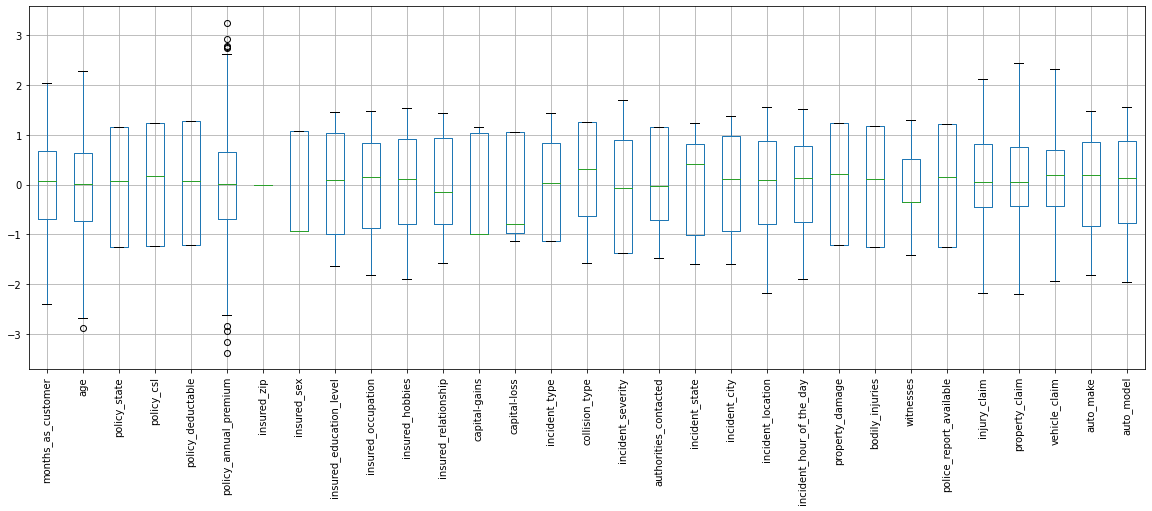

In [48]:
xc.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [50]:
y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrainw,ytrainw=smote.fit_resample(xc,y)

In [52]:
ytrainw.value_counts()

1.0    753
0.0    753
Name: fraud_reported, dtype: int64

In [53]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [54]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8079470198675497 on random state 15


In [55]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=15)
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc=accuracy_score(y_test,predlr)
acc

0.8079470198675497

In [56]:
score=cross_val_score(lr,xtrainw,ytrainw,cv=5)
score.mean()

0.753002134166465

In [57]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    predknc=knc.predict(x_test)
    acc=accuracy_score(y_test,predknc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.7549668874172185 on random state 30


In [58]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=30)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
acc=accuracy_score(y_test,predknc)
acc

0.7549668874172185

In [59]:
score=cross_val_score(knc,xtrainw,ytrainw,cv=5)
score.mean()

0.7045345536951882

In [63]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8874172185430463 on random state 47


In [64]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=47)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
acc=accuracy_score(y_test,preddtc)
acc

0.8874172185430463

In [65]:
score=cross_val_score(dtc,xtrainw,ytrainw,cv=5)
score.mean()

0.833392004576357

In [67]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    dtce=DecisionTreeClassifier(criterion="entropy")
    dtce.fit(x_train,y_train)
    preddt=dtce.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8774834437086093 on random state 34


In [68]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=34)
dtce=DecisionTreeClassifier(criterion="entropy")
dtce.fit(x_train,y_train)
preddtce=dtce.predict(x_test)
acc=accuracy_score(y_test,preddtce)
acc

0.8741721854304636

In [69]:
score=cross_val_score(dtce,xtrainw,ytrainw,cv=5)
score.mean()

0.8307407977822271

In [70]:
maxacc=0
maxrs=0
from sklearn.ensemble import RandomForestClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    rfc=RandomForestClassifier(n_estimators=200)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9205298013245033 on random state 15


In [71]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=15)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
acc

0.9172185430463576

In [72]:
score=cross_val_score(rfc,xtrainw,ytrainw,cv=5)
score.mean()

0.8805680843105762

In [73]:
maxacc=0
maxrs=0
from sklearn.ensemble import AdaBoostClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=i)
    adc=AdaBoostClassifier()
    adc.fit(x_train,y_train)
    predadc=adc.predict(x_test)
    acc=accuracy_score(y_test,predadc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9072847682119205 on random state 96


In [76]:
x_train,x_test,y_train,y_test=train_test_split(xtrainw,ytrainw,test_size=0.2,random_state=96)
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
acc=accuracy_score(y_test,predadc)
acc

0.9072847682119205

In [77]:
score=cross_val_score(adc,xtrainw,ytrainw,cv=5)
score.mean()

0.8420804822776177

In [78]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features":["auto","sqrt","log2"],"max_depth":[0,1,2,3,4,5,6,7,8],"criterion":["gini","entropy"]}
gscv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

In [79]:
gscv.fit(xtrainw,ytrainw)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [80]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [81]:
gscv.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [82]:
gscvpred=gscv.best_estimator_.predict(x_test)

In [83]:
print(accuracy_score(y_test,gscvpred))
print(confusion_matrix(y_test,gscvpred))
print(classification_report(y_test,gscvpred))

0.9801324503311258
[[142   5]
 [  1 154]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       147
         1.0       0.97      0.99      0.98       155

    accuracy                           0.98       302
   macro avg       0.98      0.98      0.98       302
weighted avg       0.98      0.98      0.98       302



In [85]:
score=cross_val_score(gscv.best_estimator_,xtrainw,ytrainw,cv=5)
score.mean()

0.8646322413148224

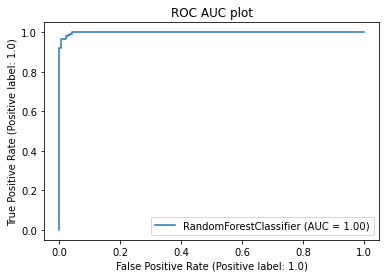

In [84]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [86]:
import joblib

In [87]:
joblib.dump(gscv.best_estimator_,"insaurance_fraud_detection.pkl")

['insaurance_fraud_detection.pkl']